In [3]:
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: heart.csv               


## Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier , plot_tree , export_graphviz
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_text
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('/content/heart.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [8]:
X = df.drop('target' , axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

## NormaL DecisionTreeClassifier

In [42]:
# tree = DecisionTreeClassifier(random_state= 42)
# tree.fit(X_train, y_train)

# y_train_pred = tree.predict(X_train)
# y_test_pred = tree.predict(X_test)

# test_acc = accuracy_score(y_test_pred, y_test)
# train_acc = accuracy_score(y_train_pred, y_train)

# print('Train Accuracy:', train_acc * 100)
# print('Test Accuracy:', test_acc * 100)

Train Accuracy: 100.0
Test Accuracy: 98.53658536585365


## With diffrent Depth Values

In [46]:
train_scores = []
test_scores = []
values = [i for i in range(1, 21)]
for i in values:
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f"max_depth: {i}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

max_depth: 1, Train Accuracy: 0.762, Test Accuracy: 0.751
max_depth: 2, Train Accuracy: 0.770, Test Accuracy: 0.678
max_depth: 3, Train Accuracy: 0.851, Test Accuracy: 0.780
max_depth: 4, Train Accuracy: 0.883, Test Accuracy: 0.800
max_depth: 5, Train Accuracy: 0.929, Test Accuracy: 0.844
max_depth: 6, Train Accuracy: 0.949, Test Accuracy: 0.883
max_depth: 7, Train Accuracy: 0.973, Test Accuracy: 0.917
max_depth: 8, Train Accuracy: 0.990, Test Accuracy: 0.976
max_depth: 9, Train Accuracy: 0.996, Test Accuracy: 0.980
max_depth: 10, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 11, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 12, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 13, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 14, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 15, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 16, Train Accuracy: 1.000, Test Accuracy: 0.985
max_depth: 17, Train Accuracy: 1.000, Test Accuracy: 0.985
max_de

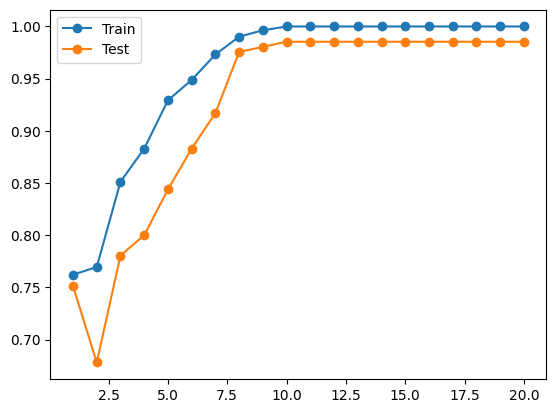

In [48]:
plt.plot(values, train_scores, '-o', label = 'Train')
plt.plot(values, test_scores, '-o', label= 'Test')
plt.legend()
plt.show()

## Visualize using Graphviz

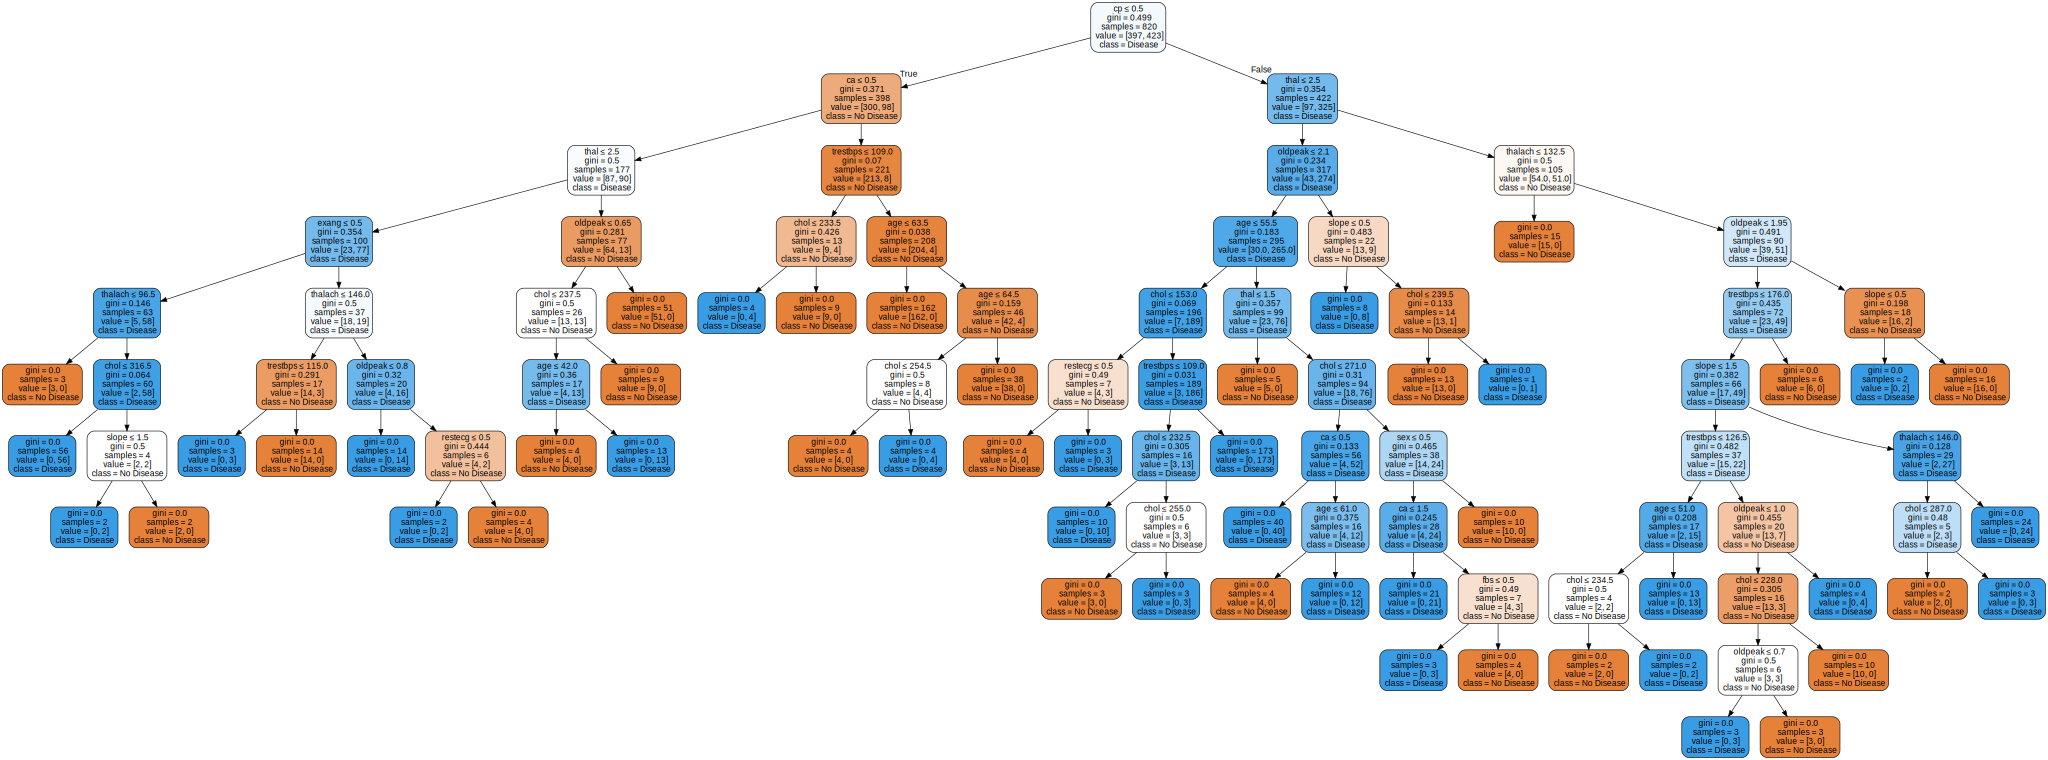

In [49]:
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=["No Disease", "Disease"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph


## Visualize using ploy_tree method

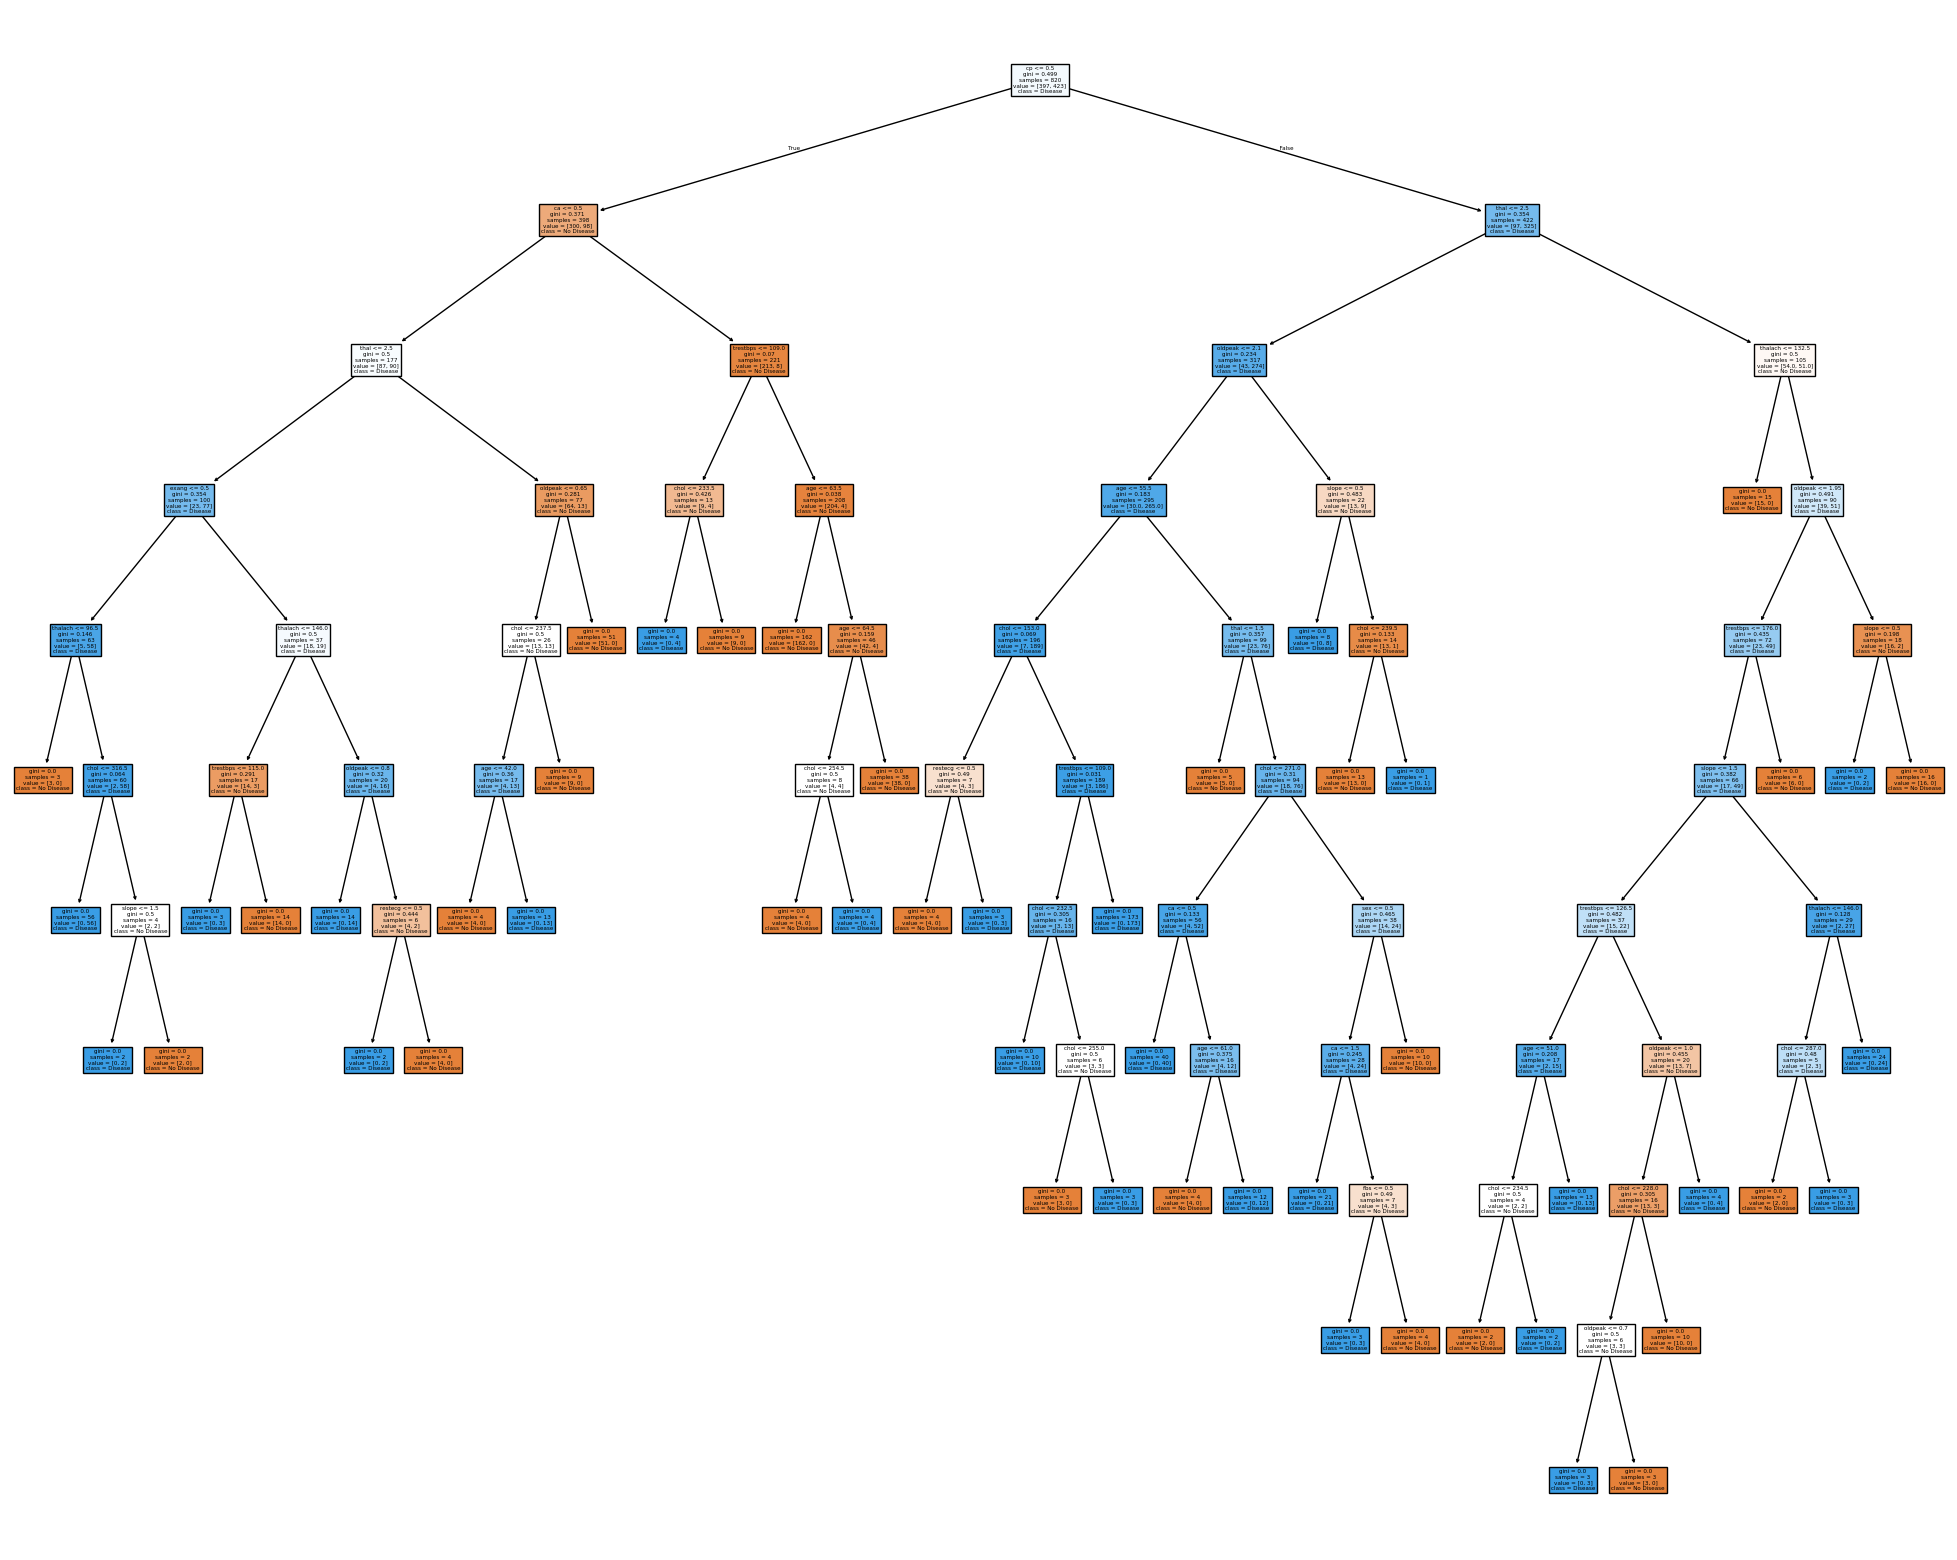

In [33]:
# # Visualization
# fig = plt.figure(figsize=(25, 20))
# _ = tree.plot_tree(clf,
#                    feature_names=X.columns,
#                    class_names=['No Disease', 'Disease'],
#                    filled=True)
# plt.show()


## Prune to prevent Overfitting

In [50]:
pruned_tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
pruned_tree.fit(X_train, y_train)

y_test_pred = pruned_tree.predict(X_test)
print('Accuracy:',accuracy_score(y_test_pred, y_test) * 100)

Accuracy: 80.0


## RandomForestClassifier

In [54]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

y_train_pred_rf = rforest.predict(X_train)
y_test_pred_rf = rforest.predict(X_test)
print("Accuracy of Random Forest Test:", accuracy_score(y_test, y_test_pred_rf) * 100)
print("Accuracy of Random Forest Train:", accuracy_score(y_train, y_train_pred_rf) * 100)

Accuracy of Random Forest Test: 98.53658536585365
Accuracy of Random Forest Train: 100.0


## Get IMP Features

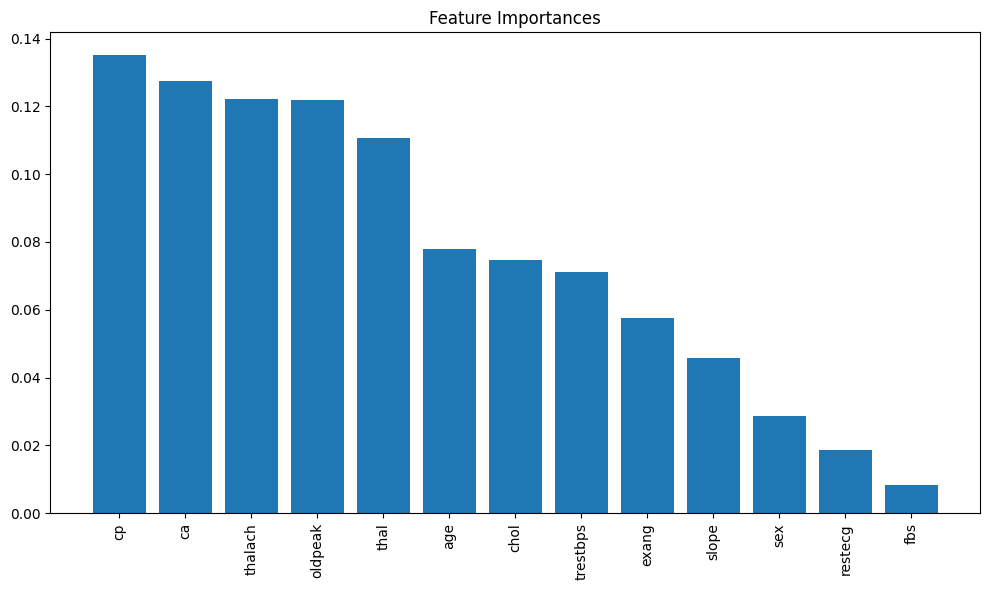

In [55]:
importances = rforest.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


## Cross Validation

In [59]:
scores_dt = cross_val_score(tree, X, y, cv=5)
scores_rf = cross_val_score(rforest, X, y, cv=5)

print("Cross-val Accuracy (Decision Tree):", scores_dt.mean() * 100)
print("Cross-val Accuracy (Random Forest):", scores_rf.mean() * 100)


Cross-val Accuracy (Decision Tree): 100.0
Cross-val Accuracy (Random Forest): 99.70731707317073
